In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import pickle


In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1','v2']]
df.columns=['label','message']
df['is_spam'] = df['label'].map({'ham':0,'spam':1})
df['word_freq_free'] = df['message'].str.lower().str.count('free')
df['word_freq_win'] = df['message'].str.lower().str.count('win')
df['word_freq_offer'] = df['message'].str.lower().str.count('offer')
df['sms_length'] = df['message'].str.len()


In [3]:
df.head()

,label,message,is_spam,word_freq_free,word_freq_win,word_freq_offer,sms_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,111
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1,1,0,155
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,61


In [4]:
df_features = df[['word_freq_free','word_freq_win','word_freq_offer','sms_length','is_spam']]
print(df_features.head())


   word_freq_free  word_freq_win  word_freq_offer  sms_length  is_spam
0               0              0                0         111        0
1               0              0                0          29        0
2               1              1                0         155        1
3               0              0                0          49        0
4               0              0                0          61        0


In [5]:
df.shape

(5572, 7)

In [6]:
df.isnull().sum()

label              0
message            0
is_spam            0
word_freq_free     0
word_freq_win      0
word_freq_offer    0
sms_length         0
dtype: int64

In [7]:
df.nunique()

label                 2
message            5169
is_spam               2
word_freq_free        4
word_freq_win         4
word_freq_offer       3
sms_length          274
dtype: int64

In [8]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


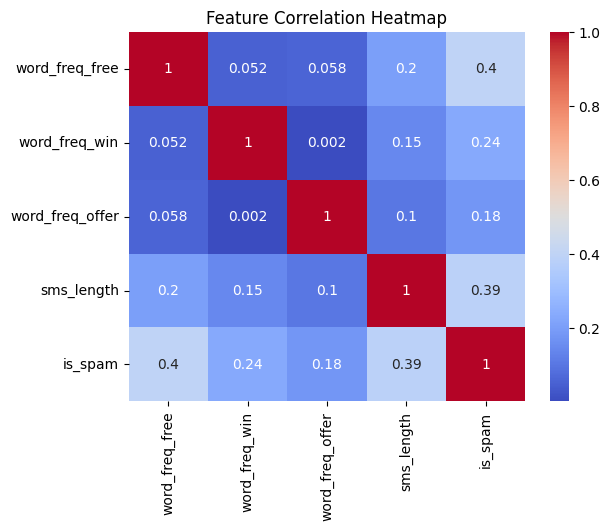

In [9]:

features = ['word_freq_free','word_freq_win','word_freq_offer','sms_length','is_spam']
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [10]:
X = df_features[['word_freq_free','word_freq_win','word_freq_offer','sms_length']]
y = df_features['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8923766816143498

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       965
           1       0.76      0.29      0.42       150

    accuracy                           0.89      1115
   macro avg       0.83      0.64      0.68      1115
weighted avg       0.88      0.89      0.87      1115



In [11]:
#  Predict a new SMS
# Example: high 'offer' and 'free' frequencies
new_sms = pd.DataFrame({
    'word_freq_free': [3],
    'word_freq_win': [0],
    'word_freq_offer': [4],
    'sms_length': [80]
})

prediction = model.predict(new_sms)
print("\nPrediction for new SMS:", "Spam" if prediction[0]==1 else "Not Spam")


Prediction for new SMS: Spam


In [12]:
with open('naive_bayes_sms_model.pkl', 'wb') as file:
    pickle.dump(model, file)